<div style="text-align: center;"> <h3>Data Mining and Wrangling</h3>
<h5>Summative Assessment 1</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

Objective: The purpose of this assessment is to evaluate your understanding of exploratory data analysis techniques, including univariate, bivariate, and trivariate/hypervariate data exploration using computational tools and visualization

## Dataset: EDA_Ecommerce_Assessment.csv

**Dataset Description**: The dataset Download datasetcontains information about customer purchasing behavior in an e-commerce platform. The variables include:

* `Customer_ID`: Unique identifier for each customer

* `Gender`: Male or Female

* `Age`: Customer's age in years

* `Browsing_Time`: Average time spent on the website per visit (in minutes)

* `Purchase_Amount`: Total amount spent in a single transaction (in USD)

* `Number_of_Items`: Number of items purchased per transaction

* `Discount_Applied`: Discount percentage applied to the transaction

* `Total_Transactions`: Total number of transactions by the customer

* `Category`: Product category (e.g., Electronics, Clothing, Home & Kitchen, etc.)

* `Satisfaction_Score`: Customer satisfaction score (1-5 scale)

## Unit 1: Univariate Data Analysis

### Load the dataset and summarize its structure.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set_style("darkgrid")

df = pd.read_csv("EDA_Ecommerce_Assessment.csv")
print("Shape:", df.shape)
print(df.info())
df.head()

Shape: (3000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         3000 non-null   int64  
 1   Gender              3000 non-null   object 
 2   Age                 3000 non-null   int64  
 3   Browsing_Time       3000 non-null   float64
 4   Purchase_Amount     3000 non-null   float64
 5   Number_of_Items     3000 non-null   int64  
 6   Discount_Applied    3000 non-null   int64  
 7   Total_Transactions  3000 non-null   int64  
 8   Category            3000 non-null   object 
 9   Satisfaction_Score  3000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 234.5+ KB
None


,Customer_ID,Gender,Age,Browsing_Time,Purchase_Amount,Number_of_Items,Discount_Applied,Total_Transactions,Category,Satisfaction_Score
0,1,Male,65,46.55,231.81,6,17,16,Clothing,2
1,2,Female,19,98.80,472.78,8,15,43,Books,4
2,3,Male,23,79.48,338.44,1,28,31,Electronics,1
3,4,Male,45,95.75,37.13,7,43,27,Home & Kitchen,5
4,5,Male,46,33.36,235.53,3,10,33,Books,3


In [52]:
df.nunique()

Customer_ID           3000
Gender                   2
Age                     52
Browsing_Time         2637
Purchase_Amount       2924
Number_of_Items          9
Discount_Applied        50
Total_Transactions      49
Category                 5
Satisfaction_Score       5
Browsing_Time_Cat        5
dtype: int64

### Create histograms and boxplots to visualize the distribution of Purchase_Amount, Number_of_Items, and Satisfaction_Score.


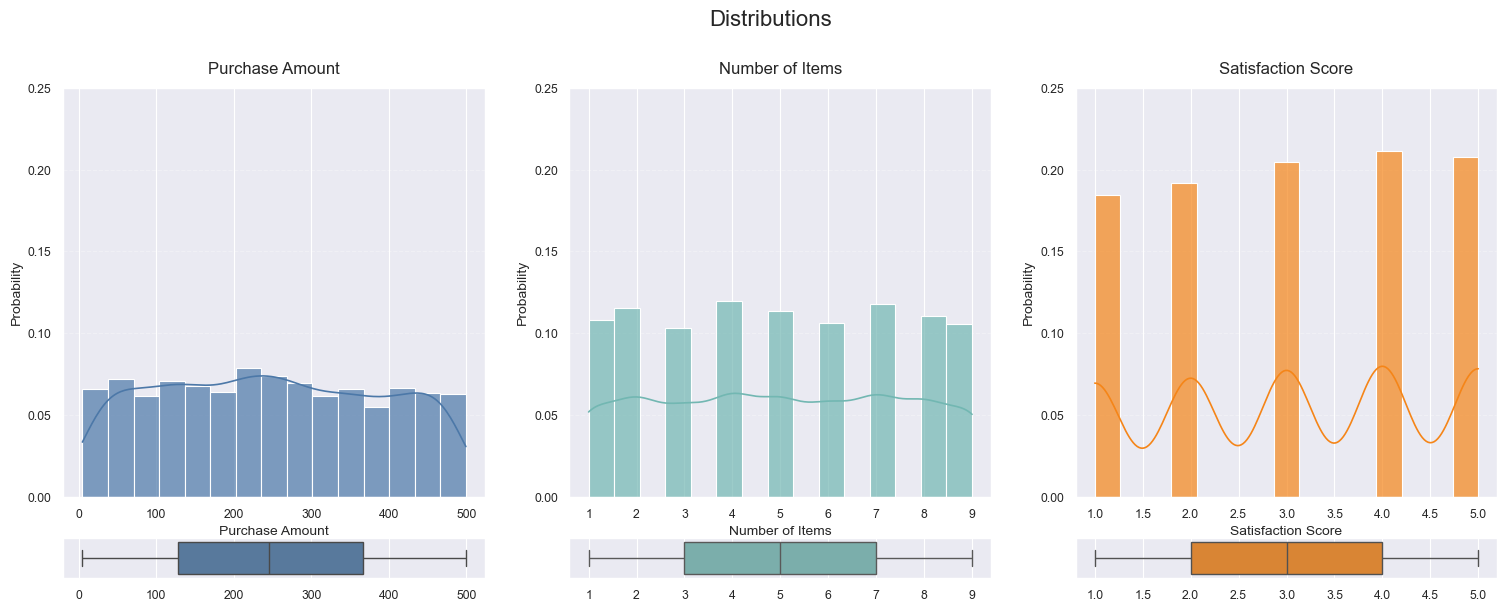

In [32]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
cols = ['Purchase_Amount', 'Number_of_Items', 'Satisfaction_Score']
colors = ['#4c78a8', '#72b7b2', '#f58518'] 

plt.suptitle('Distributions', fontsize=16, y=1.05)
plt.tight_layout()

for i, col in enumerate(cols):
    sns.histplot(df, x=col, ax=ax[i], stat="probability",
        color=colors[i], alpha=0.7, edgecolor='white', 
        linewidth=0.8, kde=True)
    
    ax[i].set_title(f'{col.replace("_", " ")}', fontsize=12, pad=10)
    ax[i].set_ylabel('Probability', fontsize=10)
    ax[i].set_xlabel(col.replace('_', ' '), fontsize=10)
    ax[i].set_ylim(0, 0.25)
    ax[i].grid(axis='y', alpha=0.3, linestyle='--')
    
    ax_box = ax[i].inset_axes([0, -0.2, 1, 0.1])
    sns.boxplot(x=df[col], ax=ax_box, color=colors[i], width=0.8)
    ax_box.set(yticks=[], xlabel='')
    
plt.subplots_adjust(wspace=0.2)

### Compute measures of central tendency (mean, median, mode) and spread (variance, standard deviation, IQR) for Purchase_Amount.

In [33]:
mean, median, upper, lower = df['Purchase_Amount'].describe()[['mean', '50%', '75%', '25%']]
var, std = df['Purchase_Amount'].aggregate(['var', 'std'])
mode = df['Purchase_Amount'].mode()[0]
iqr = upper - lower

stats = pd.Series({
    'mean': mean,
    'median': median,
    'mode': mode,
    'std': std,
    'var': var,
    'iqr': iqr
})

print(f"Summary Statistics of 'Purchase_Amount'\n{stats}")

Summary Statistics of 'Purchase_Amount'
mean        247.962540
median      245.090000
mode         29.330000
std         140.875783
var       19845.986209
iqr         238.505000
dtype: float64


### Compare the distribution of Browsing_Time and Purchase_Amount across different Gender groups using density plots.

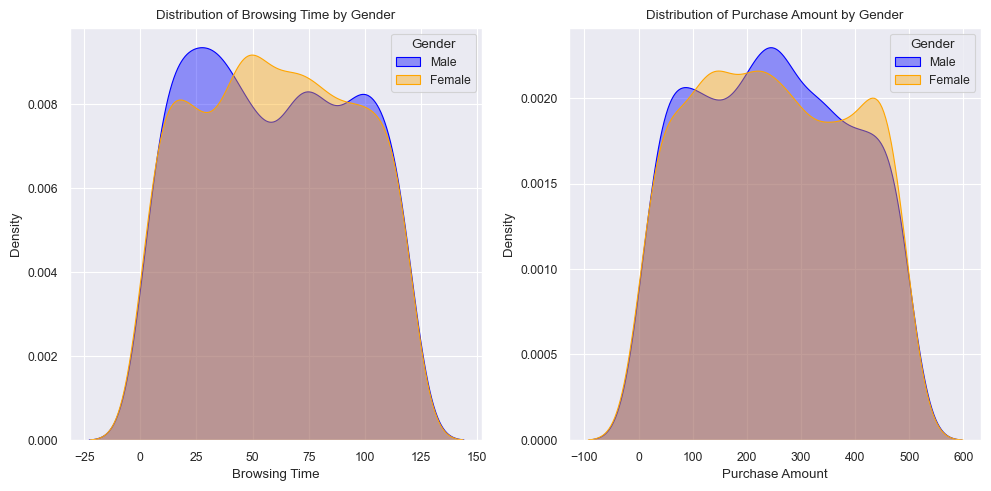

In [34]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

# Browsing Time
sns.kdeplot(df[df['Gender'] == 'Male'], x='Browsing_Time', 
            color='blue', fill=True, alpha=0.4, ax=ax[0], 
            label='Male', zorder=1)
sns.kdeplot(df[df['Gender'] == 'Female'], x='Browsing_Time', 
            color='orange', fill=True, alpha=0.4, ax=ax[0], 
            label='Female', zorder=2)

ax[0].set_title('Distribution of Browsing Time by Gender')
ax[0].set_xlabel('Browsing Time')
ax[0].set_ylabel('Density')
ax[0].legend(title='Gender')

# Purchase Amount
sns.kdeplot(df[df['Gender'] == 'Male'], x='Purchase_Amount', 
            color='blue', fill=True, alpha=0.4, ax=ax[1], 
            label='Male', zorder=1)
sns.kdeplot(df[df['Gender'] == 'Female'], x='Purchase_Amount', 
            color='orange', fill=True, alpha=0.4, ax=ax[1], 
            label='Female', zorder=2)

ax[1].set_title('Distribution of Purchase Amount by Gender')
ax[1].set_xlabel('Purchase Amount')
ax[1].set_ylabel('Density')
ax[1].legend(title='Gender')

plt.tight_layout()

### Apply a logarithmic or square root transformation on Browsing_Time and evaluate changes in skewness.

Text(0, 0.5, 'Density')

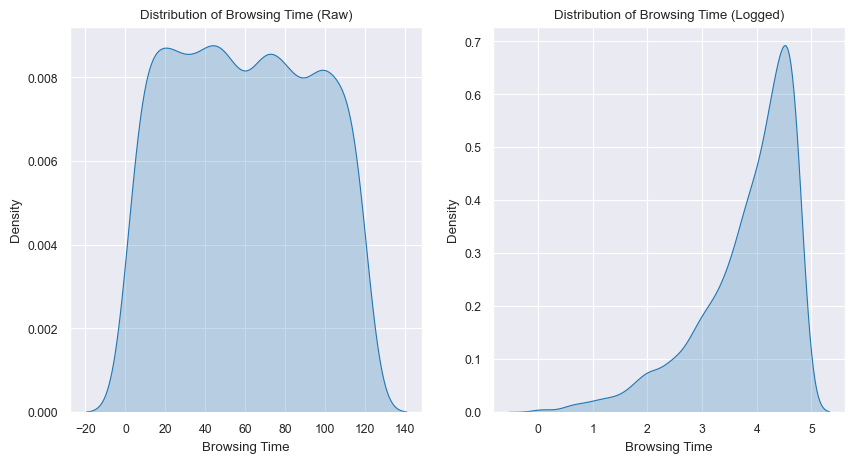

In [35]:
bro_log = np.log(df['Browsing_Time'])

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.kdeplot(df['Browsing_Time'], fill=True, ax=ax[0])
ax[0].set_title('Distribution of Browsing Time (Raw)')
ax[0].set_xlabel('Browsing Time')
ax[0].set_ylabel('Density')

sns.kdeplot(bro_log, fill=True, ax=ax[1])
ax[1].set_title('Distribution of Browsing Time (Logged)')
ax[1].set_xlabel('Browsing Time')
ax[1].set_ylabel('Density')

In [36]:
print("Skewness (Orginal):", df.Browsing_Time.skew())
print("Skewness (Logged):", bro_log.skew())

Skewness (Orginal): 0.03865422769091899
Skewness (Logged): -1.3656484526284594


### Fit a simple linear regression model predicting Purchase_Amount based on Browsing_Time. Interpret the results.

Coefficient of Browsing_Time: -0.07839485124063325


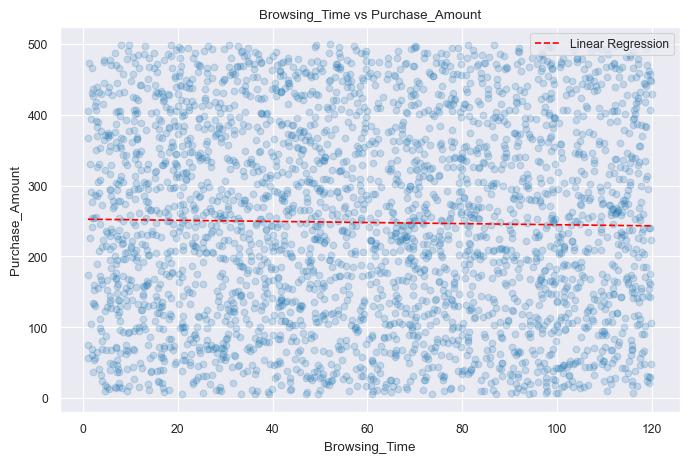

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['Browsing_Time']], df['Purchase_Amount'])

brow_sim = np.linspace(df['Browsing_Time'].min(), df['Browsing_Time'].max())
y_pred = model.predict(pd.DataFrame({"Browsing_Time" : brow_sim}))

print("Coefficient of Browsing_Time:", model.coef_[0])

plt.figure(figsize=(8,5))

plt.scatter(x=df['Browsing_Time'], y=df['Purchase_Amount'], alpha=0.2)
sns.lineplot(x=brow_sim, y=y_pred, label="Linear Regression", color="Red", linestyle="--")
plt.title("Browsing_Time vs Purchase_Amount")
plt.ylabel("Purchase_Amount")
plt.xlabel("Browsing_Time")
plt.show();

In [38]:
import scipy.stats as stats
from sklearn.utils.validation import check_is_fitted

def statistics_simple(X : pd.DataFrame, y : pd.Series, model, alpha=0.05):
    check_is_fitted(model)

    n = len(y)
    y_pred = model.predict(X)

    residuals = y - y_pred
    mse = (residuals**2).sum() / (n-1)
    se  = np.sqrt(mse / ((X.values - X.values.mean())**2).sum())

    t_stat = model.coef_[0] / se

    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2)) 

    if p_value < alpha:
        print(f"Reject H₀: β₁ = 0 (p-value = {p_value:.4f}) at {alpha} significance level")
    else:
        print(f"Fail to reject H₀: β₁ = 0 (p-value = {p_value:.4f}) at {alpha} significance level")

    print(f"Coefficient (β₁): {model.coef_[0]:.4f}")
    print(f"Standard Error: {se:.4f}")
    print(f"t-statistic: {t_stat:.4f}")

In [39]:
statistics_simple(X=df[['Browsing_Time']], y=df['Purchase_Amount'], model=model)

Fail to reject H₀: β₁ = 0 (p-value = 0.2960) at 0.05 significance level
Coefficient (β₁): -0.0784
Standard Error: 0.0750
t-statistic: -1.0453


## Unit 2: Bivariate Data Analysis

Create scatter plots to explore the relationship between Purchase_Amount and Number_of_Items.

Text(0, 0.5, 'Purchase Amount')

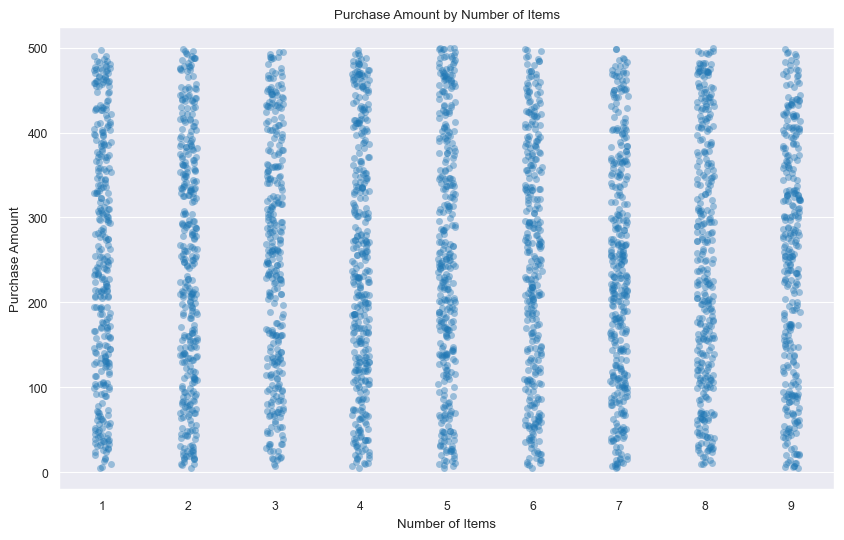

In [40]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Number_of_Items', y='Purchase_Amount', data=df, jitter=True, alpha=0.4)
plt.title('Purchase Amount by Number of Items')
plt.xlabel('Number of Items')
plt.ylabel('Purchase Amount')

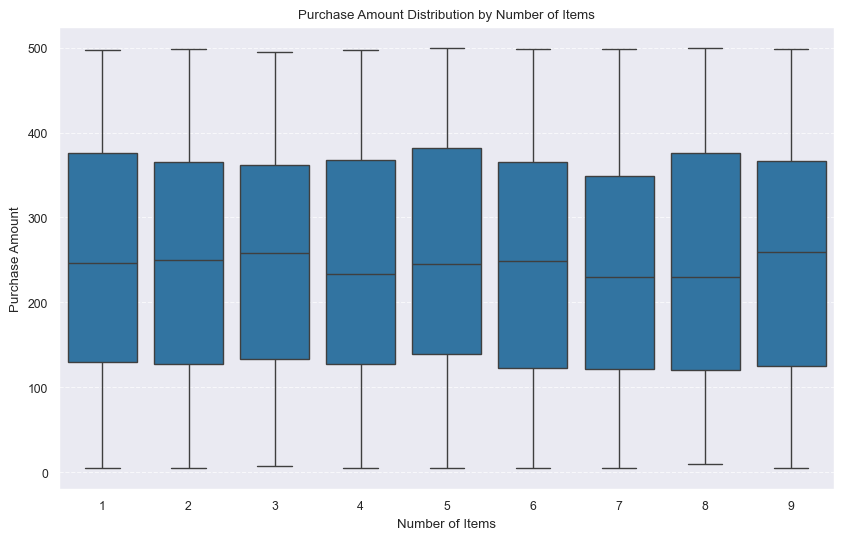

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number_of_Items', y='Purchase_Amount', data=df)
plt.title('Purchase Amount Distribution by Number of Items')
plt.xlabel('Number of Items')
plt.ylabel('Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Fit a polynomial regression model for Purchase_Amount and Browsing_Time and compare it with a simple linear model.

In [42]:
import statsmodels.formula.api as smf

formu = "Purchase_Amount ~ np.power(Browsing_Time, 1)"

model = smf.ols(formula=formu, data=df).fit()
param = model.params
param['R-SQ'] = model.rsquared
param[::-2]

R-SQ           0.000364
Intercept    252.655956
dtype: float64

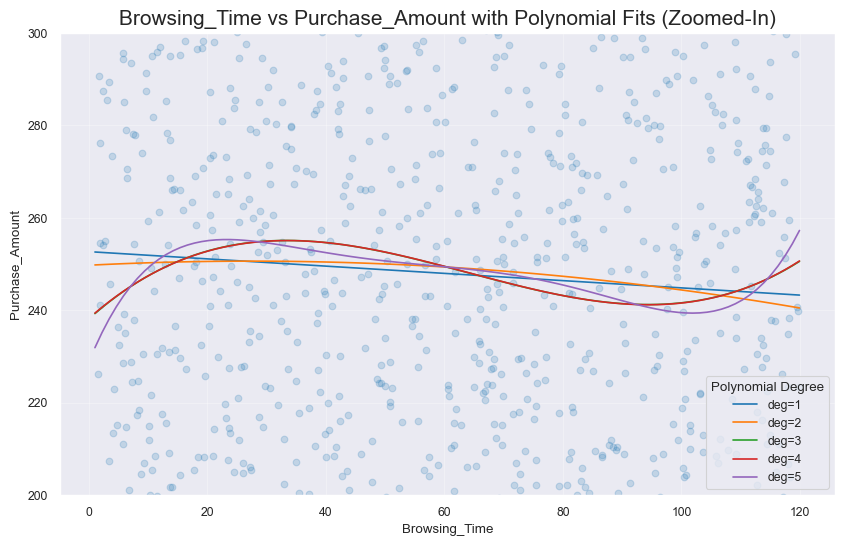

In [43]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

brow_sim = np.linspace(df['Browsing_Time'].min(), df['Browsing_Time'].max(), 100)

plt.figure(figsize=(10, 6))
plt.scatter(x=df['Browsing_Time'], y=df['Purchase_Amount'], alpha=0.2)

coefs = []
df_res = pd.DataFrame({'Browsing_Time': brow_sim})
r_sq = []
upto = 5
for i in range(upto):
    degree = i + 1
    terms = [f"np.power(Browsing_Time, {j+1})" for j in range(degree)]
    formula = f"Purchase_Amount ~ {' + '.join(terms)}"
    model = smf.ols(formula=formula, data=df).fit()
    
    df_res[f'deg={degree}'] = model.predict(pd.DataFrame({"Browsing_Time": brow_sim}))
    r_sq.append(model.rsquared)
    
    param = model.params
    param['R-SQ'] = model.rsquared
    coefs.append(param)

df_melted = pd.melt(df_res, id_vars='Browsing_Time', var_name='Polynomial Degree', value_name='Predicted Purchase Amount')

sns.lineplot(data=df_melted, x='Browsing_Time', y='Predicted Purchase Amount', hue='Polynomial Degree')

plt.title("Browsing_Time vs Purchase_Amount with Polynomial Fits (Zoomed-In)", fontsize=15)
plt.ylabel("Purchase_Amount")
plt.xlabel("Browsing_Time")
plt.ylim(200,300)
plt.grid(alpha=0.3)
plt.show()

In [44]:
coefs = pd.DataFrame(coefs, index=range(1,upto+1))
cols = coefs.columns.tolist()
cols.remove('Intercept')
cols.remove('R-SQ')
new_order = ['R-SQ', 'Intercept'] + cols
coefs = coefs[new_order]
coefs = pd.DataFrame(coefs, index=range(1,upto+1))
coefs

,R-SQ,Intercept,"np.power(Browsing_Time, 1)","np.power(Browsing_Time, 2)","np.power(Browsing_Time, 3)","np.power(Browsing_Time, 4)","np.power(Browsing_Time, 5)"
1,0.000364,252.655956,-0.078395,NaN,NaN,NaN,NaN
2,0.000442,249.715045,0.064709,-0.001182,NaN,NaN,NaN
3,0.001194,238.119313,1.152562,-0.023386,0.000122,NaN,NaN
4,0.001194,238.238162,1.134770,-0.022742,0.000114,3.378991e-08,NaN
5,0.001406,228.869295,3.135626,-0.133233,0.002503,-2.201186e-05,7.270555e-08


### Apply LOESS (Locally Estimated Scatterplot Smoothing) to Purchase_Amount vs. Browsing_Time and visualize the results.

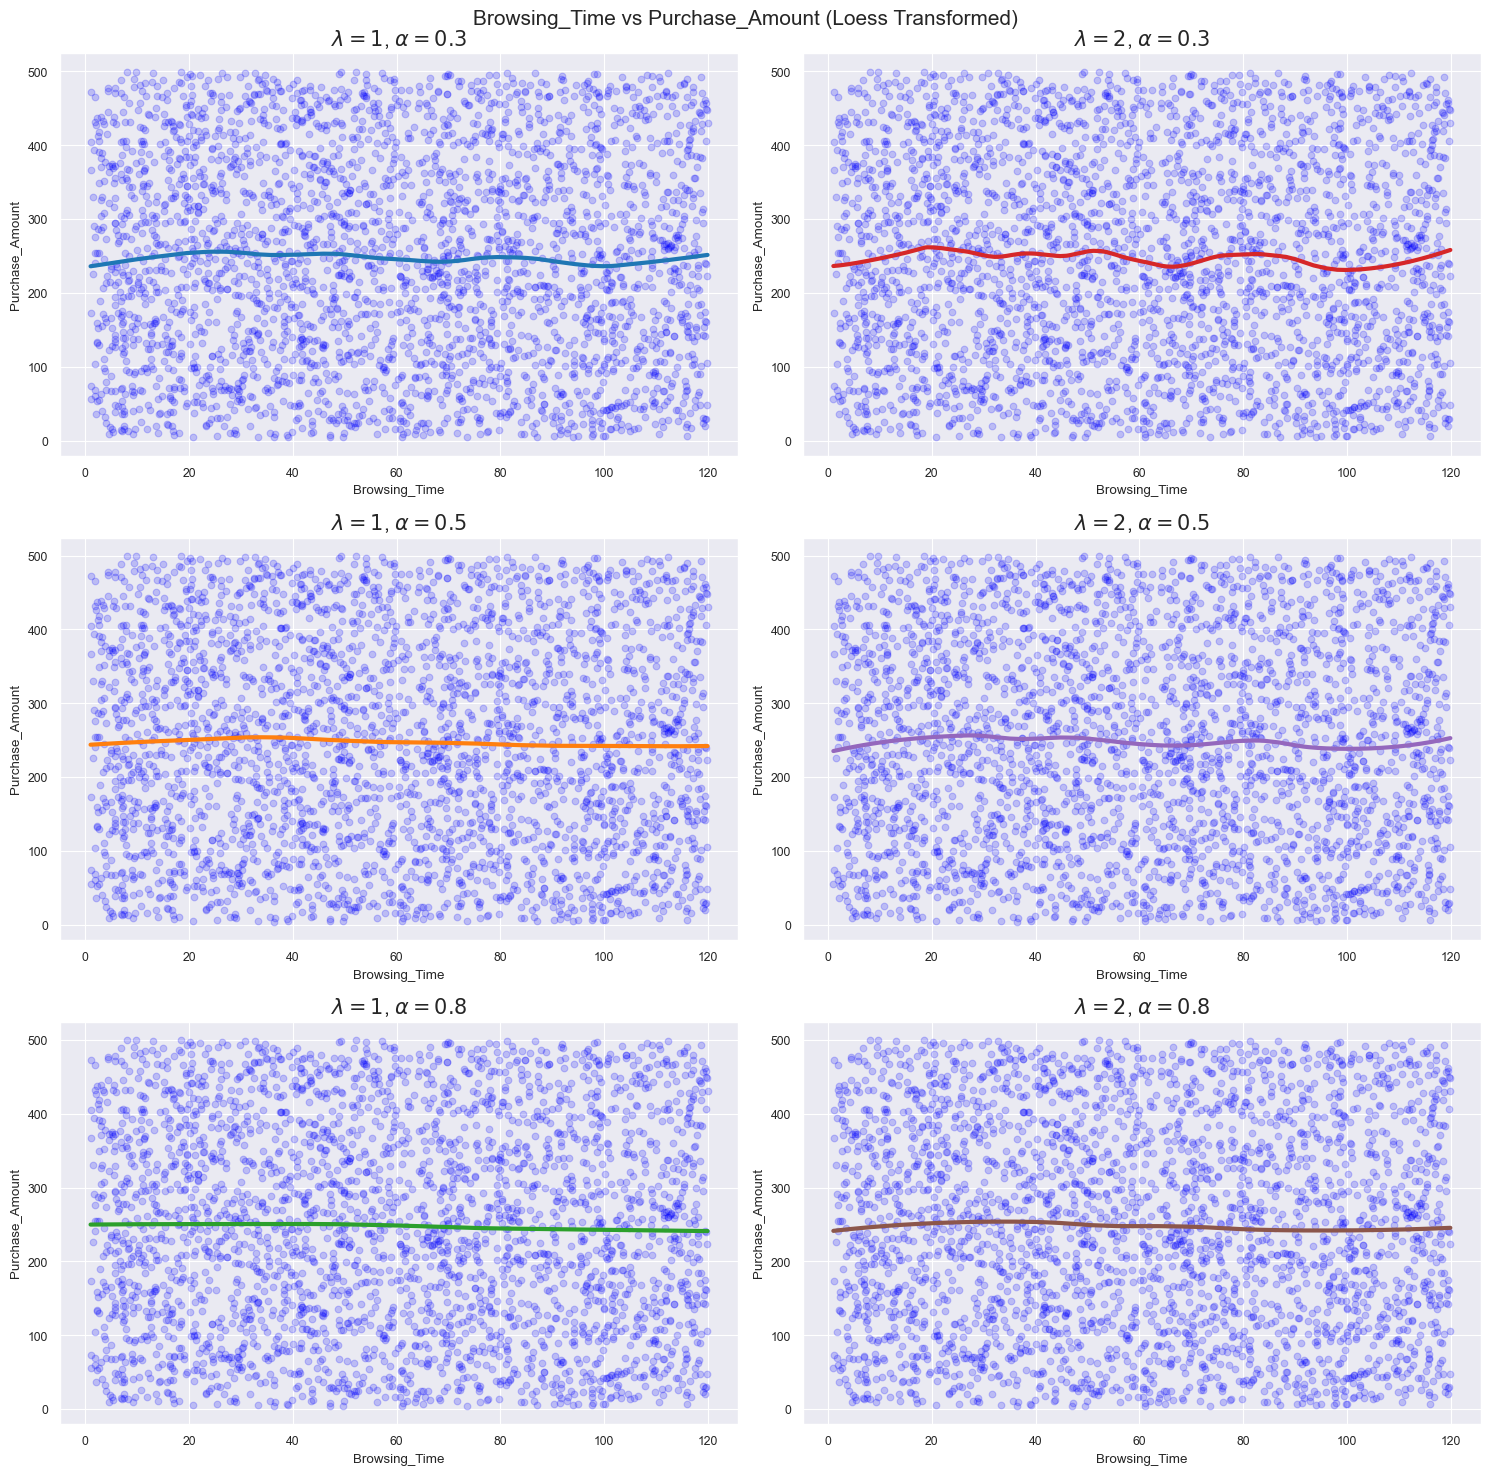

In [45]:
from loess.loess_1d import loess_1d

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,15))
lambda_ = [1,2]
spans = np.array([0.30, 0.50, 0.80])

total_plots = len(lambda_) * len(spans)
colors = sns.color_palette("tab10", total_plots)

for ind_l,lamb in enumerate(lambda_):
    for ind_s, span in enumerate(spans):
        xout, yout, weights = loess_1d(x=df['Browsing_Time'].values, y=df['Purchase_Amount'].values, degree=lamb,frac=span)
        
        sorted_indices = np.argsort(xout)
        xout_sorted = xout[sorted_indices]
        yout_sorted = yout[sorted_indices]

        color_index = ind_l * len(spans) + ind_s
        color = colors[color_index]
        
        axes[ind_s][ind_l].scatter(x=df['Browsing_Time'], y=df['Purchase_Amount'], color="blue", alpha=0.2)
        axes[ind_s][ind_l].plot(xout_sorted, yout_sorted, linewidth=3, color=color)
        axes[ind_s][ind_l].set_title(f'$\\lambda={lamb}$, $\\alpha={span}$', fontsize=15)
        axes[ind_s][ind_l].set_ylabel("Purchase_Amount")
        axes[ind_s][ind_l].set_xlabel("Browsing_Time")

fig.suptitle("Browsing_Time vs Purchase_Amount (Loess Transformed)", fontsize=15)
plt.tight_layout();

### Compare robust regression methods (Huber or Tukey regression) with ordinary least squares (OLS).

OLS coefficients: [ 2.52655956e+02 -7.83948512e-02]
Huber coefficients: [ 2.52646125e+02 -8.02671970e-02]
OLS MSE: 19832.15
Huber MSE: 19832.16
OLS R-Sqr: 0.0003641880980536083
Huber R-Sqr: 0.0003825413551605677


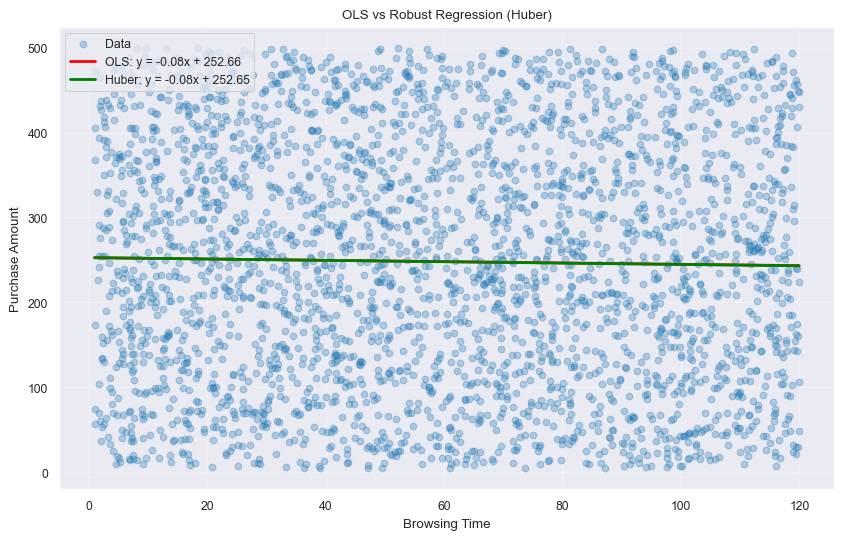

In [46]:
from statsmodels.robust import robust_linear_model
import statsmodels.api as sm

X = df[['Browsing_Time']]
X = sm.add_constant(X)
y = df['Purchase_Amount']

ols_model = sm.OLS(y, X).fit()
huber_model = robust_linear_model.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

x_range = np.linspace(df['Browsing_Time'].min(), df['Browsing_Time'].max(), 100)
X_pred = sm.add_constant(x_range.reshape(-1, 1))

print(f"OLS coefficients: {ols_model.params.values}")
print(f"Huber coefficients: {huber_model.params.values}")
print(f"OLS MSE: {np.mean((y - ols_model.predict(X))**2):.2f}")
print(f"Huber MSE: {np.mean((y - huber_model.predict(X))**2):.2f}")
print(f"OLS R-Sqr: {ols_model.rsquared}")

# Huber object don't have R-Sqr in python
RSE = ((huber_model.predict(X) - y.mean())**2).sum()
TSE = ((y - y.mean())**2).sum()
r_sq_huber = RSE / TSE

print(f"Huber R-Sqr: {r_sq_huber}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Browsing_Time'], y, alpha=0.3, label='Data')
plt.plot(x_range, ols_model.predict(X_pred), 'r-', linewidth=2, 
         label=f'OLS: y = {ols_model.params.iloc[1]:.2f}x + {ols_model.params.iloc[0]:.2f}')
plt.plot(x_range, huber_model.predict(X_pred), 'g-', linewidth=2, 
         label=f'Huber: y = {huber_model.params.iloc[1]:.2f}x + {huber_model.params.iloc[0]:.2f}')

plt.title('OLS vs Robust Regression (Huber)')
plt.xlabel('Browsing Time')
plt.ylabel('Purchase Amount')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## Unit 3: Trivariate/Hypervariate Data Analysis

### Explore interaction effects between Browsing_Time and Category on Purchase_Amount using interaction plots.

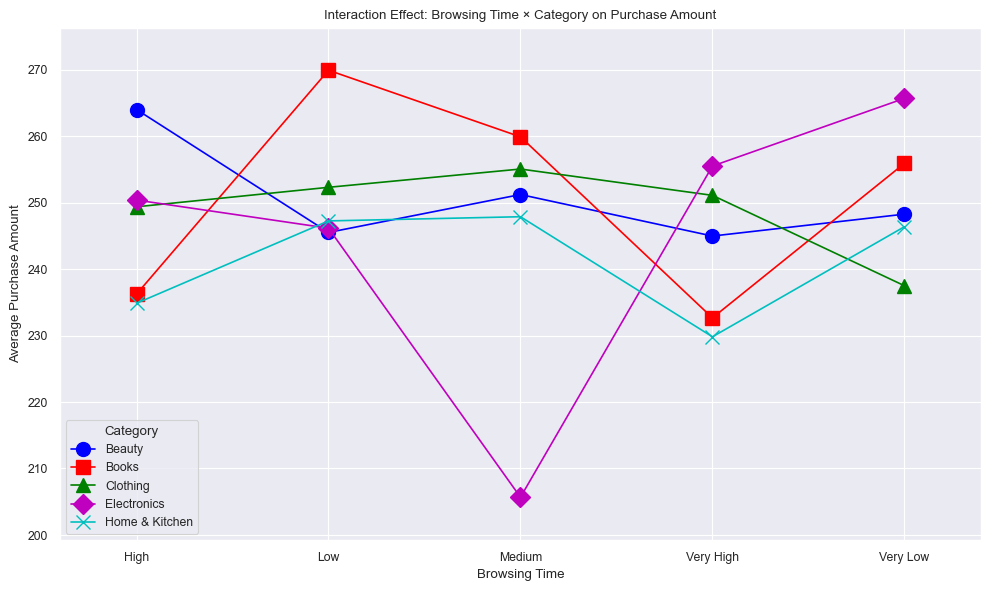

In [47]:
from statsmodels.graphics.factorplots import interaction_plot

df['Browsing_Time_Cat'] = pd.cut(df['Browsing_Time'], 
                             bins=5, 
                             labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Browsing_Time_Cat'] = df['Browsing_Time_Cat'].astype(str) 

df['Category'] = df['Category'].astype(str)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['b', 'r', 'g', 'm', 'c']
markers = ['o', 's', '^', 'D', 'x']

interaction_plot(
    x=df['Browsing_Time_Cat'],
    trace=df['Category'],
    response=df['Purchase_Amount'],
    colors=colors[:len(df['Category'].unique())],
    markers=markers[:len(df['Category'].unique())],
    ms=10,
    ax=ax
)

plt.title('Interaction Effect: Browsing Time × Category on Purchase Amount')
plt.xlabel('Browsing Time')
plt.ylabel('Average Purchase Amount')
plt.tight_layout()
plt.show()

### Create coplots of Purchase_Amount against Browsing_Time for different levels of Category.

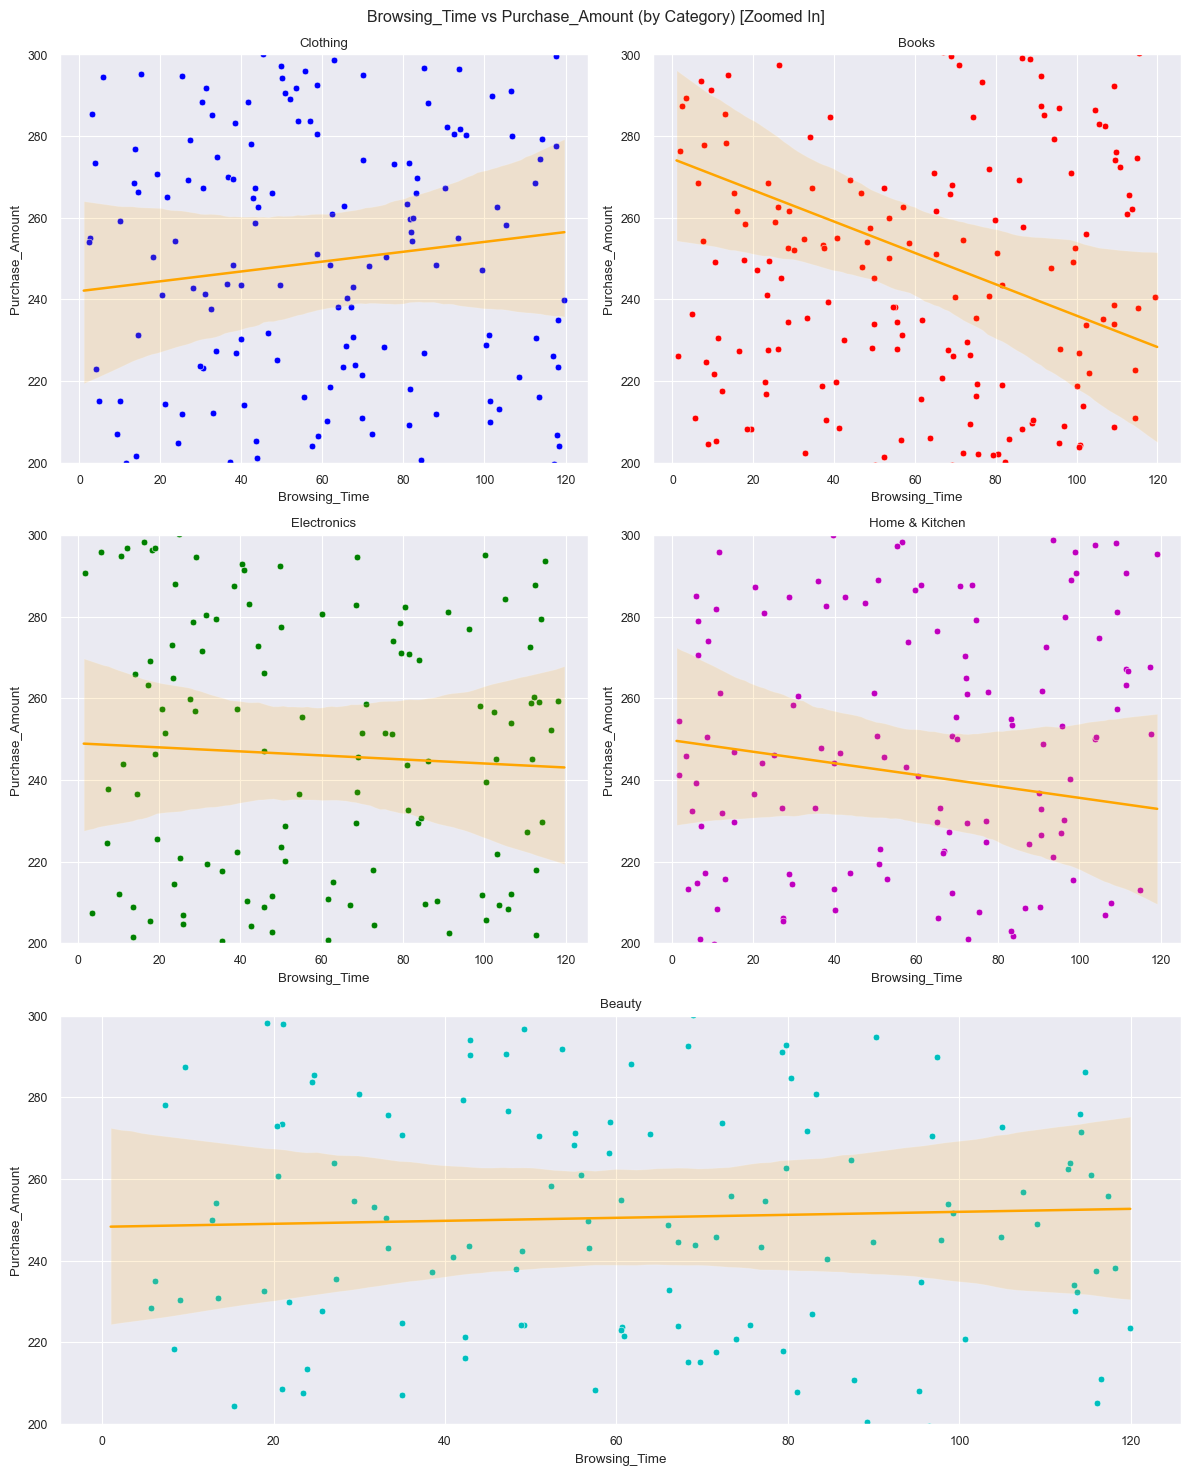

In [48]:
cats = df['Category'].unique()
n_cats = len(cats)

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 15))
plt.suptitle("Browsing_Time vs Purchase_Amount (by Category) [Zoomed In]")
axes = ax.flatten()
colors = ['b', 'r', 'g', 'm', 'c']

for i in range(n_cats):
    df_plot = df[df['Category'] == cats[i]]
    sns.scatterplot(df_plot, x="Browsing_Time", y="Purchase_Amount", color=colors[i], ax=axes[i])
    sns.regplot(x='Browsing_Time', y='Purchase_Amount', data=df_plot, 
                scatter=False, ax=axes[i], color="orange")
    if i != 4:
        axes[i].set_title(cats[i])
        axes[i].set_ylabel("Purchase_Amount")
        axes[i].set_xlabel("Browsing_Time")
        axes[i].set_ylim(200, 300)
    else:
        axes[i].axis('off')

axes[5].set_visible(False)

beauty_index = list(cats).index('Beauty') if 'Beauty' in cats else None

if beauty_index is not None:
    big_ax = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    
    df_plot = df[df['Category'] == 'Beauty']
    sns.scatterplot(df_plot, x="Browsing_Time", y="Purchase_Amount", color=colors[beauty_index], ax=big_ax)
    sns.regplot(x='Browsing_Time', y='Purchase_Amount', data=df_plot, 
                scatter=False, ax=big_ax, color="orange")
    big_ax.set_title('Beauty')
    big_ax.set_ylabel("Purchase_Amount")
    big_ax.set_xlabel("Browsing_Time")
    big_ax.set_ylim(200, 300)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [49]:
def fit_reg(data : pd.DataFrame, target : str, predictor : str):
    model = smf.ols(formula=f"{target} ~ {predictor}", data=data).fit()
    param = model.params
    param['R-SQ'] = model.rsquared
    return param

result = []
for cat in cats:
    mask = df['Category'] == cat
    coefs = fit_reg(data=df[mask], target="Purchase_Amount",predictor="Browsing_Time")
    result.append({cat : coefs})

coefs_df = pd.DataFrame({list(res.keys())[0] : res[list(res.keys())[0]] for res in result}).rename(index={'Browsing_Time': 'Browsing_Time_Coef'})
coefs_df

,Clothing,Books,Electronics,Home & Kitchen,Beauty
Intercept,241.997243,274.421247,248.975825,249.723245,248.295447
Browsing_Time_Coef,0.120667,-0.384280,-0.049329,-0.140983,0.036659
R-SQ,0.000842,0.008765,0.000144,0.001212,0.000079


### Use level plots or contour plots to visualize relationships between Browsing_Time, Number_of_Items, and Purchase_Amount.

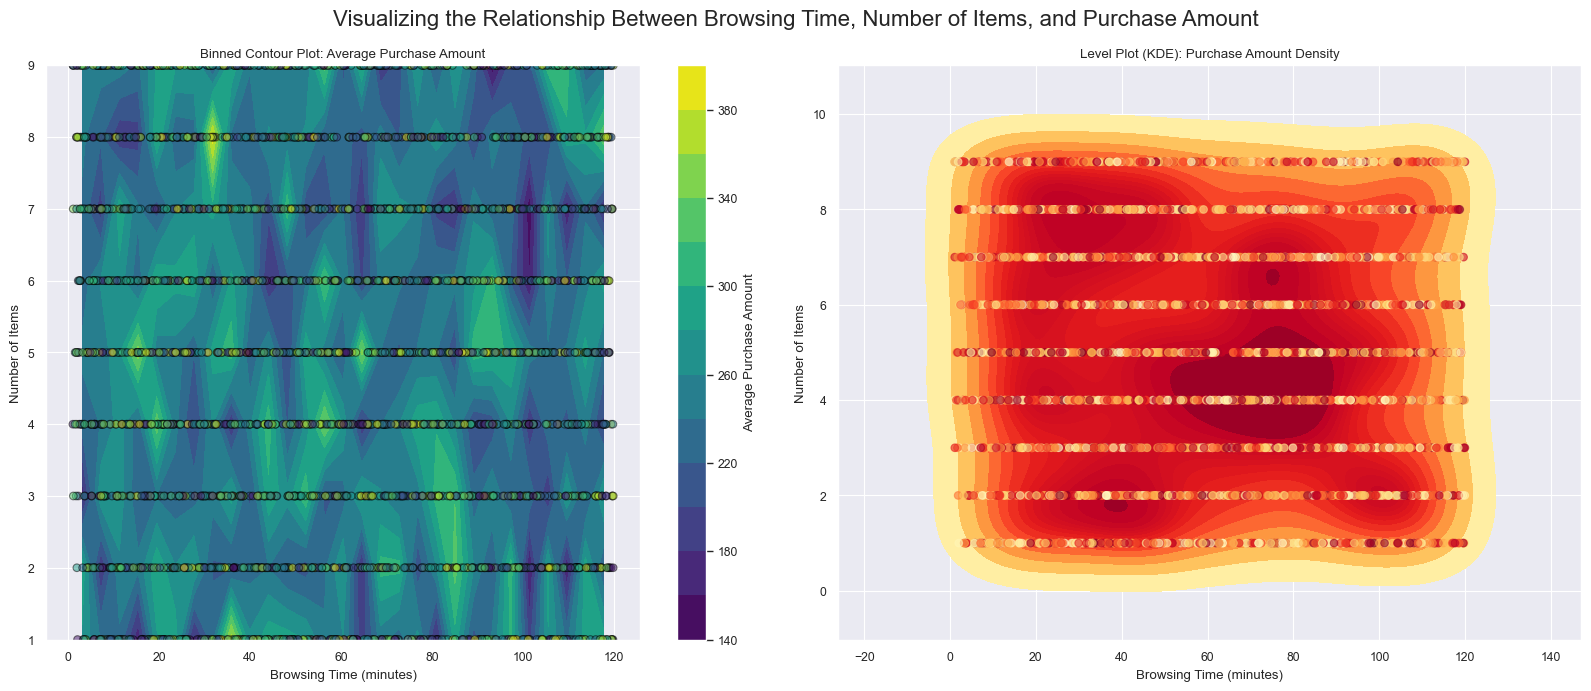

In [50]:
from scipy.stats import binned_statistic_2d


fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Extract the data we need
x = df['Browsing_Time']
y = df['Number_of_Items']
z = df['Purchase_Amount']

x_bins = np.linspace(x.min(), x.max(), 30) 
y_bins = np.arange(y.min()-0.5, y.max()+1.5) 

ret = binned_statistic_2d(x, y, z, statistic='mean', 
                          bins=[x_bins, y_bins])
                          
x_centers = (x_bins[:-1] + x_bins[1:]) / 2
y_centers = (y_bins[:-1] + y_bins[1:]) / 2
X, Y = np.meshgrid(x_centers, y_centers)

contour = axes[0].contourf(X, Y, ret.statistic.T, 15, cmap='viridis')
axes[0].set_title('Binned Contour Plot: Average Purchase Amount')
axes[0].set_xlabel('Browsing Time (minutes)')
axes[0].set_ylabel('Number of Items')
axes[0].scatter(x, y, c=z, cmap='viridis', edgecolor='k', s=30, alpha=0.5)
cbar = fig.colorbar(contour, ax=axes[0])
cbar.set_label('Average Purchase Amount')

sns.kdeplot(x=x, y=y, weights=z, 
           fill=True, cmap="YlOrRd", 
           thresh=0.05,
           levels=15,
           ax=axes[1])
axes[1].scatter(x, y, c=z, cmap='YlOrRd', s=30, alpha=0.6)
axes[1].set_title('Level Plot (KDE): Purchase Amount Density')
axes[1].set_xlabel('Browsing Time (minutes)')
axes[1].set_ylabel('Number of Items')

plt.suptitle('Visualizing the Relationship Between Browsing Time, Number of Items, and Purchase Amount', 
             fontsize=16)
             
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Perform multiple regression with Purchase_Amount as the dependent variable and Browsing_Time, Number_of_Items, and Satisfaction_Score as predictors. Perform model selection and assess variable importance.

In [61]:
def fit_reg_multi(data : pd.DataFrame, target : str, predictors : list):
    model = smf.ols(formula=f"{target} ~ {" + ".join(predictors)}", data=data).fit()
    return model

target = "Purchase_Amount"
features = ['Browsing_Time', "Number_of_Items", "Satisfaction_Score"]
model = fit_reg_multi(data=df, target=target, predictors=features)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Purchase_Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7928
Date:                Tue, 18 Mar 2025   Prob (F-statistic):              0.498
Time:                        00:03:21   Log-Likelihood:                -19099.
No. Observations:                3000   AIC:                         3.821e+04
Df Residuals:                    2996   BIC:                         3.823e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            261.3499      9.249     28.256      0.000     243.214     279.486
Browsing_Time         -0.0795      0.075     -1.060      0.289      -0.227       0.068
Number_of_Items       -0.7832      1.005     -0.779      0.436      -2.754       1.187
Satisfaction_Score    -1.5387      1.834     -0.839      0.402      -5.136       2.058
==============================================================================
Omnibus:                     1753.087   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.270
Skew:                           0.047   Prob(JB):                     2.89e-37
Kurtosis:                       1.844   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For model selection, we couldn't really do much here for the dataset itself is problematic. Looking at the p-values on the table above, the lowest non-intercept p-value comes from `Browsing_Time` at 0.289, which is still far above any reasonable significance threshold. The R-squared value of 0.001 indicates that our predictors explain virtually none of the variance in Purchase_Amount. The adjusted R-squared is even worse at practically 0, suggesting that adding these predictors is actually making the model worse by penalizing model performance relative to the degrees of freedom.

The F-statistic of 0.7928 with a corresponding p-value of 0.498 confirms that we cannot reject the null hypothesis that all regression coefficients are zero. In other words, our current model suggests no meaningful relationship between our predictors and the outcome variable.

For variable importance, the standardized coefficients and their t-statistics show that all three predictors have negative relationships with Purchase_Amount, but none reach statistical significance:
- Satisfaction_Score (t=-0.839, p=0.402)
- Number_of_Items (t=-0.779, p=0.436)
- Browsing_Time (t=-1.060, p=0.289)

The tests from the last table further supports our concern. The Omnibus test (1753.087, p=0.000) indicates a non-normality of residuals, while the Jarque-Bera statistic (168.270) confirms this issue. Note the normality of residuals is one of the assumptions of linear regression, so we have already got ourselves an invalid model. The Durbin-Watson statistic of 2.072, which is one of the few acceptable aspects of this model, indicating limited autocorrelation (which I assume that we don't have any in the first place; let's plot it later). The limited autocorrelation implies that the residuals are independent of each other, and is actually an assumption for linear regression.

Given these results, we should consider either:
1. Transforming the variables to address potential non-linear relationships
2. Exploring alternative modeling techniques beyond standard OLS regression
3. Investigating whether important predictors are missing from our dataset
4. Checking for data quality issues or outliers that might be obscuring meaningful relationships

The extremely low R-squared coupled with high p-values suggests fundamental problems with our current modeling approach for this particular dataset.

<Figure size 1000x600 with 0 Axes>

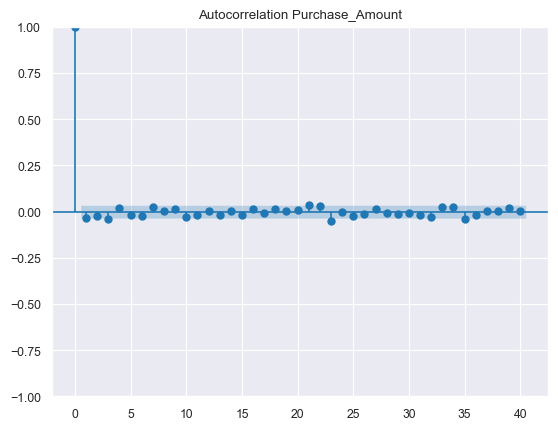

In [65]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(df['Purchase_Amount'], lags=40, alpha=0.05)
plt.title('Autocorrelation Purchase_Amount')
plt.show();

This confirms our statement earlier that autocorrelation isn't an issue in our data in the first place, thus the acceptable result in Durbin-Watson statistic of 2.072.

Despite all that, let us perform a proper linear regression modelling and see if we can produce a significant result later.

#### Split

In [130]:
from sklearn.model_selection import train_test_split
y = df['Purchase_Amount'].copy()
X = df.drop(columns="Purchase_Amount").copy().set_index("Customer_ID")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (2400, 9)
Shape of X_test: (600, 9)


#### Data Pre-Processing

In [131]:
X_train.apply(lambda x: x.unique(), axis=0)

Gender                                                   [Female, Male]
Age                   [59, 38, 33, 40, 21, 25, 62, 64, 27, 50, 36, 3...
Browsing_Time         [20.2, 5.78, 103.32, 52.91, 53.58, 110.39, 76....
Number_of_Items                             [1, 4, 5, 6, 2, 7, 8, 9, 3]
Discount_Applied      [43, 30, 2, 22, 44, 37, 46, 14, 26, 16, 27, 20...
Total_Transactions    [45, 12, 28, 4, 11, 30, 22, 14, 18, 7, 25, 17,...
Category              [Books, Clothing, Beauty, Electronics, Home & ...
Satisfaction_Score                                      [3, 1, 4, 5, 2]
Browsing_Time_Cat              [Very Low, Very High, Medium, High, Low]
dtype: object

In [132]:
# Factoring Gender 
X_train['IsMale'] = X_train['Gender'].apply(lambda x : x=="Male").astype(int)
X_train.drop(columns="Gender", inplace=True)

# Browsing_Time_Cat
mapping = {"Very Low" : 1, 
           "Low" : 2, 
           "Medium" : 3, 
           "High" : 4,
           "Very High" : 5}

X_train['Browsing_Time_Cat'] = X_train['Browsing_Time_Cat'].map(mapping)

# Category
X_train = pd.get_dummies(X_train,prefix="Cat", columns=["Category"], dtype=int)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler

class MultiReg(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model_ = None

    def fit(self, X, y=None):
        data = X.copy()
        data['target'] = y
        self.model_ = smf.ols(formula=self.formula, data=data).fit()
        return self

    def predict(self, X):
        return self.model_.predict(X)

X_col = X_train.columns
col_fix = {col : col.replace(" ", "_").replace("&", "") for col in X_col}
X_train = X_train.rename(col_fix, axis=1)

ss = StandardScaler(with_mean=True, with_std=True)

X_scaled_data = ss.fit_transform(X_train)
X_scaled_df = pd.DataFrame(X_scaled_data, index=X_train.index).rename({i : X_train.columns[i] for i in range(len(col_fix))}, axis=1)

MultiReg(formula='target ~ Age + Browsing_Time + Number_of_Items + '
                 'Discount_Applied + Total_Transactions + Satisfaction_Score + '
                 'Browsing_Time_Cat + IsMale + Cat_Beauty + Cat_Books + '
                 'Cat_Clothing + Cat_Electronics + Cat_Home__Kitchen')

<Axes: >

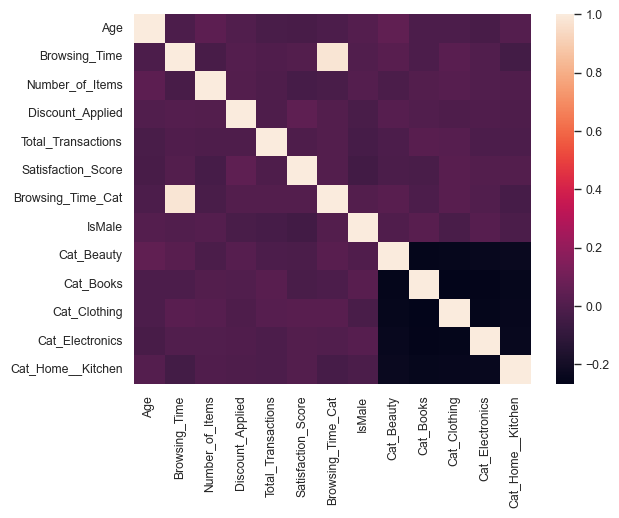

In [141]:
cor = X_scaled_df.corr()

sns.heatmap(cor)

In [143]:
X_scaled_df.drop(columns="Browsing_Time_Cat", inplace=True)

In [148]:
formula = f"target ~ {" + ".join(X_scaled_df.columns)}"
model = MultiReg(formula=formula)
model.fit(X=X_scaled_df, y=y_train)

MultiReg(formula='target ~ Age + Browsing_Time + Number_of_Items + '
                 'Discount_Applied + Total_Transactions + Satisfaction_Score + '
                 'IsMale + Cat_Beauty + Cat_Books + Cat_Clothing + '
                 'Cat_Electronics + Cat_Home__Kitchen')

In [149]:
model.model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9166
Date:                Tue, 18 Mar 2025   Prob (F-statistic):              0.523
Time:                        02:53:16   Log-Likelihood:                -12302.
No. Observations:                1932   AIC:                         2.463e+04
Df Residuals:                    1920   BIC:                         2.469e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            247.7371      3.221     76.922      0.000     241.421     254.053
Age                   -2.2780      3.214     -0.709      0.479      -8.581       4.025
Browsing_Time         -0.6978      3.222     -0.217      0.829      -7.018       5.622
Number_of_Items       -6.7644      3.193     -2.119      0.034     -13.026      -0.503
Discount_Applied      -0.2840      3.235     -0.088      0.930      -6.628       6.060
Total_Transactions     2.1377      3.224      0.663      0.507      -4.185       8.460
Satisfaction_Score     0.8319      3.215      0.259      0.796      -5.473       7.136
IsMale                 0.4156      3.228      0.129      0.898      -5.915       6.746
Cat_Beauty             2.8159      2.588      1.088      0.277      -2.260       7.892
Cat_Books             -0.3804      2.546     -0.149      0.881      -5.373       4.612
Cat_Clothing           3.0798      2.566      1.200      0.230      -1.952       8.112
Cat_Electronics       -1.3916      2.631     -0.529      0.597      -6.551       3.768
Cat_Home__Kitchen     -4.1952      2.560     -1.639      0.101      -9.216       0.825
==============================================================================
Omnibus:                     1136.089   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.999
Skew:                           0.040   Prob(JB):                     2.14e-24
Kurtosis:                       1.839   Cond. No.                     3.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

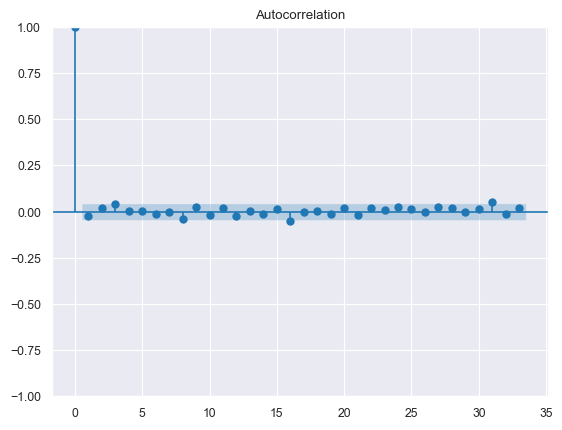

In [157]:
plot_acf(model.model_.resid);